<a href="https://colab.research.google.com/github/spantoskey/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Scott_Pantoskey_LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# **I. Wrangle Data**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

def wrangle(df):
  # Make a copy
  df = df.copy()

  # Drop repeat rows (observations)
  df.drop_duplicates(inplace=True)

  # Drop repeat columns (features)
  df.drop(columns=['quantity_group', 'extraction_type_group'], inplace=True)

  # Drop constant features
  df.drop(columns=['recorded_by'], inplace=True)
  
  # Drop features with lots of NaN values
  df.dropna(axis=1, thresh=30_000, inplace=True)

  # high-cardinality
  drop_cols = [col for col in df.select_dtypes('object').columns
               if df[col].nunique() > 100]
  df.drop(columns=drop_cols, inplace=True)

  # # drop datetime column
  # df.drop(columns='date_recorded')

  # # feature engineering
  # df['pump_age'] = df['date_recorded'].dt.year - df['construction_year']
  # df['date_recorded'] = df['date_recorded'].dt.year

  return df

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train = wrangle(train)
test = wrangle(test)

# **II. Split Data**

In [7]:
# split the target vector from the feature matrix in the training set

target = 'status_group'
y = train[target]
X = train.drop(columns=target)

In [8]:
# Split the training set into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **III. Establish Baseline**

In [9]:
# identify the majority class in the y_train as baseline since this is a classification model

print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.5429713804713805


# **IV. Build Model**

In [11]:
#import relevant data packs for random forest model
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder

In [71]:
# build the random forest model

rf_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs = -1,
                           random_state = 42,
                           max_depth = 18,
                           max_features=0.4,
                           max_samples=0.5)
)

rf_model.fit(X_train, y_train);

# **V. Check Metrics**

In [72]:
print('Random Forest Training Accuracy:', rf_model.score(X_train, y_train))
print('Random Forest Validation Accuracy:', rf_model.score(X_val, y_val))

Random Forest Training Accuracy: 0.898442760942761
Random Forest Validation Accuracy: 0.8056397306397306


# Hyperparameter Tuning

In [ ]:
# build for loop to identify the optimal number of max_depths

depths = range(2,32, 2)
train_acc = []
val_acc= []

for depth in depths:
  rf_model = make_pipeline(
  OrdinalEncoder(),
  SimpleImputer(),
  RandomForestClassifier(n_jobs = -1,
                          random_state = 42,
                          max_depth=depth)
)
  rf_model.fit(X_train, y_train);
  
  train_acc.append(rf_model.score(X_train, y_train))
  val_acc.append(rf_model.score(X_val, y_val))



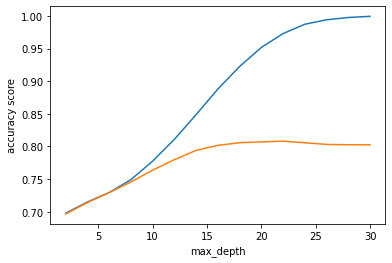

In [22]:
# plot the accuracy scores by max depth
import matplotlib.pyplot as plt
plt.plot(depths, train_acc, label='training')
plt.plot(depths, val_acc, label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.legend;

In [58]:
# build for loop to identify the optimal number of max_features
import numpy as np 

features = np.arange(0.2,1,0.1)
train_acc = []
val_acc= []

for feature in features:
    rf_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs = -1,
                            random_state = 42,
                            max_depth=18,
                            max_features=feature)
  )
    rf_model.fit(X_train, y_train);
    
    train_acc.append(rf_model.score(X_train, y_train))
    val_acc.append(rf_model.score(X_val, y_val))

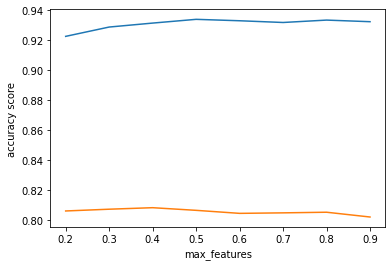

In [59]:
# plot the accuracy scores by max features
import matplotlib.pyplot as plt
plt.plot(features, train_acc, label='training')
plt.plot(features, val_acc, label='validation')
plt.xlabel('max_features')
plt.ylabel('accuracy score')
plt.legend;

In [61]:
# build for loop to identify the optimal number of max_samples

samples = np.arange(0.2, 1, 0.1)
train_acc = []
val_acc= []

for sample in samples:
    rf_model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_jobs = -1,
                            random_state = 42,
                            max_depth=18,
                            max_features=0.4,
                            max_samples=sample)
  )
    rf_model.fit(X_train, y_train);
    
    train_acc.append(rf_model.score(X_train, y_train))
    val_acc.append(rf_model.score(X_val, y_val))

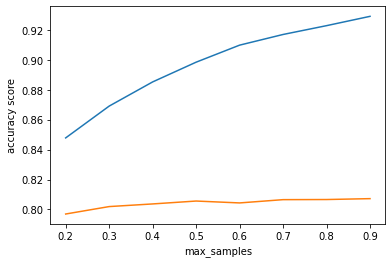

In [70]:
# plot the accuracy scores by max features
import matplotlib.pyplot as plt
plt.plot(samples, train_acc, label='training')
plt.plot(samples, val_acc, label='validation')
plt.xlabel('max_samples')
plt.ylabel('accuracy score')
plt.legend;

# **VI. Communicate Results**

In [67]:
importances = rf_model.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features).sort_values()

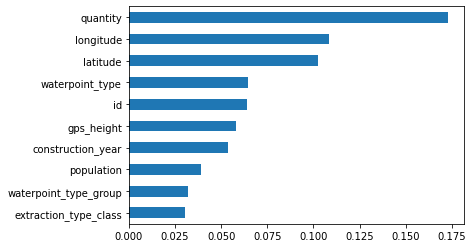

In [69]:
feat_imp.tail(10).plot(kind='barh')